In [1]:
import ares
import numpy as np
import matplotlib.pyplot as pl

In [2]:
# Independent variables
redshifts = np.array([3, 3.8, 4, 4.9, 5, 5.9, 6, 6.9, 7, 7.9, 8])
MUV = np.arange(-28, -8.8, 0.2)
Mh = np.logspace(7, 13, 61)

# blob 1: the LF. Give it a name, and the function needed to calculate it.
blob_n1 = ['galaxy_lf']
blob_i1 = [('z', redshifts), ('x', MUV)]
blob_f1 = ['LuminosityFunction']


In [3]:
blob_pars = \
{
 'blob_names': [blob_n1],
 'blob_ivars': [blob_i1],
 'blob_funcs': [blob_f1],
 'blob_kwargs': [None],
}

In [4]:
base_pars = ares.util.ParameterBundle('mirocha2017:base').pars_by_pop(0, True)
base_pars.update(blob_pars)

# This is important!
base_pars['pop_calib_lum'] = None

In [30]:
free_pars = \
  [
   'pq_func_par0[0]',
   'pq_func_par1[0]',
   'pq_func_par2[0]',
   'pq_func_par3[0]',
  ]

is_log = [True, True, False, False]

# import distpy
# from distpy.distribution import UniformDistribution #not working!
# from distpy import DistributionSet
# from distpy import UniformDistribution

# ps = DistributionSet()
# distpy.distribution.UniformDistribution
# ps.add_distribution(UniformDistribution(-3, 0.), 'pq_func_par0[0]')
# ps.add_distribution(UniformDistribution(9, 13),  'pq_func_par1[0]')
# ps.add_distribution(UniformDistribution(0, 2),   'pq_func_par2[0]')
# ps.add_distribution(UniformDistribution(-2, 0),  'pq_func_par3[0]')

ps = [(np.linspace(-3, 0., 50), 'pq_func_par0[0]'),  (np.linspace(9, 13., 50), 'pq_func_par1[0]'), \
      (np.linspace(0., 2, 50), 'pq_func_par2[0]'), (np.linspace(-2, 0., 50), 'pq_func_par3[0]')]

In [15]:
guesses = \
{
 'pq_func_par0[0]': -1,
 'pq_func_par1[0]': 11.5,
 'pq_func_par2[0]': 0.5,
 'pq_func_par3[0]': -0.5,
}

In [16]:
# Initialize a fitter object and give it the data to be fit
fitter_lf = ares.inference.FitGalaxyPopulation(**base_pars)

# The data can also be provided more explicitly
# fitter_lf.data = 'bouwens2015'

In [17]:
fitter = ares.inference.ModelFit(**base_pars)
fitter.add_fitter(fitter_lf)

# Establish the object to which we'll pass parameters
# from ares.populations.GalaxyCohort import GalaxyCohort
from ares.populations.GalaxyHOD import GalaxyHOD

fitter.simulator = GalaxyHOD

In [18]:
fitter.save_hmf = True  # cache HMF for a speed-up!
fitter.save_psm = True  # cache source SED model (e.g., BPASS, S99)

# Setting this flag to False will make ARES generate new files for each checkpoint.
# 2-D blobs can get large, so this allows us to just download a single
# snapshot or two if we'd like (useful if running on remote machine)
fitter.checkpoint_append = False

fitter.parameters = free_pars
fitter.is_log = is_log
fitter.prior_set = ps

# In general, the more the merrier (~hundreds)
fitter.nwalkers = 16

fitter.jitter = [0.1] * len(fitter.parameters)
fitter.guesses = guesses

# Run the thing
fitter.run('test_lfcal', burn=0, steps=10, save_freq=1, clobber=True)

NameError: name 'DistributionSet' is not defined

In [19]:
anl = ares.analysis.ModelSet('test_lfcal')


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_lfcal                                                                             ####


AttributeError: 'NoneType' object has no attribute 'shape'

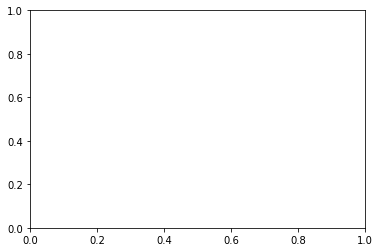

In [12]:
ax = anl.ReconstructedFunction('galaxy_lf', ivar=[6, None], samples='all', color='b', alpha=0.01)

ax.set_yscale('log')